# Importing Libraries 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
np.random.seed(42)

# Introduction

## Loading the Data

In [2]:
df = pd.read_csv("../Data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [6]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
df[["math score", "reading score", "writing score"]].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Data Analysis

In [8]:
passing_score = 75
df["MathScorePass"] = np.where(df["math score"] < passing_score,
                              "Fail",
                              "Pass")
df["ReadingScorePass"] = np.where(df["reading score"] < passing_score,
                                 "Fail",
                                 "Pass")
df["WritingScorePass"] = np.where(df["writing score"] < passing_score,
                                "Fail", 
                                "Pass")


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathScorePass,ReadingScorePass,WritingScorePass
0,female,group B,bachelor's degree,standard,none,72,72,74,Fail,Fail,Fail
1,female,group C,some college,standard,completed,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Fail,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


In [42]:
def get_count_plot(x,
                  hue,
                  data,
                  palette,
                  title): 
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.countplot(x=x, hue=hue, data=data, palette=palette, ax=ax);    
    
def get_scatter_plot(x, 
                     y,
                    hue,
                    data,
                    palette,
                    title): 
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.stripplot(x=x, y=y, hue=hue, data=data, palette=palette, ax=ax, alpha=0.75)
    
def get_point_plot(x,
                  y,
                  hue,
                  data,
                  palette,
                  title,
                  markers=["o", "x"],
                  linestyle=["-", "--"],
                  ):
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.pointplot(x=x, y=y, hue=hue, data=data, palette=palette, markers=markers, linestyle=linestyle, ax=ax)

## Grade Based on Gender

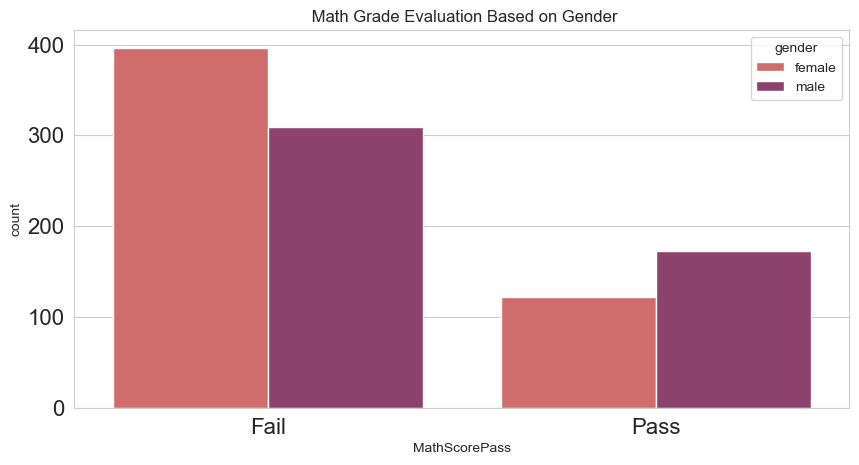

In [11]:
get_count_plot(x="MathScorePass",
              hue="gender",
              data=df,
              palette="flare",
              title=" Math Grade Based on Gender")
    

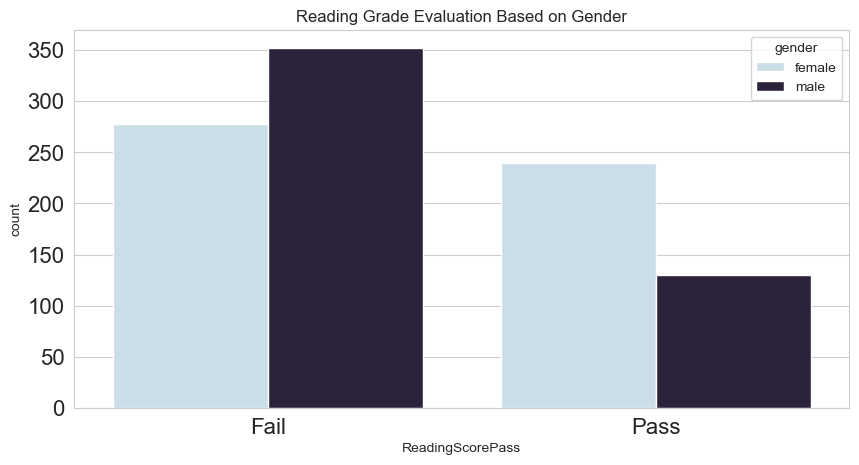

In [12]:
get_count_plot(x="ReadingScorePass",
              hue="gender",
              data=df,
              palette='ch:s=.25,rot=-.25',
              title="Reading Grade Based on Gender")

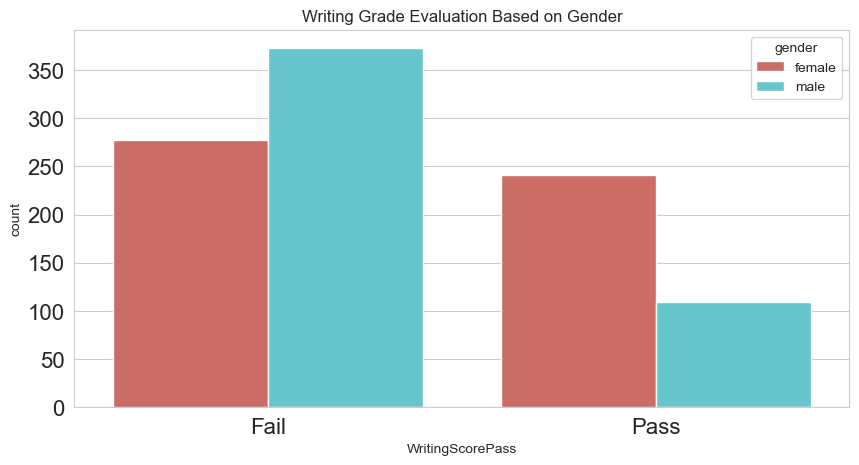

In [13]:
get_count_plot(x="WritingScorePass",
              hue="gender",
              data=df,
              palette="hls",
              title="Writing Grade Based on Gender")

## Grade based on Race/Ethnicity

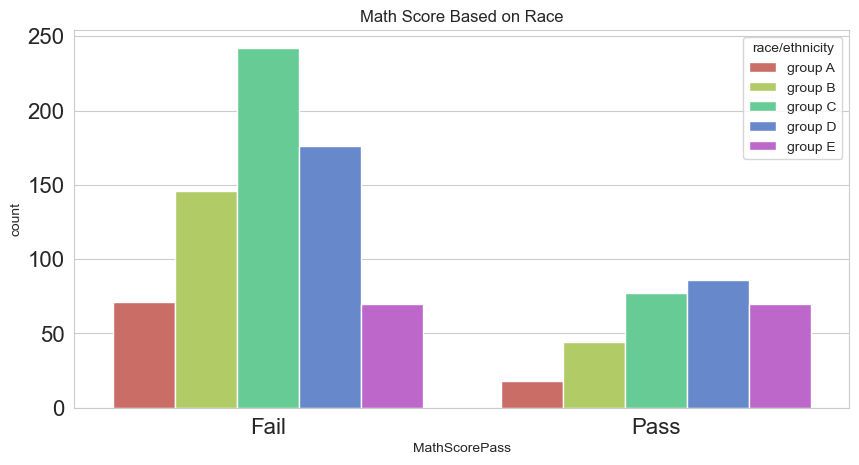

In [14]:
get_count_plot(x="MathScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette='hls',
              title="Math Grade Based on Race")

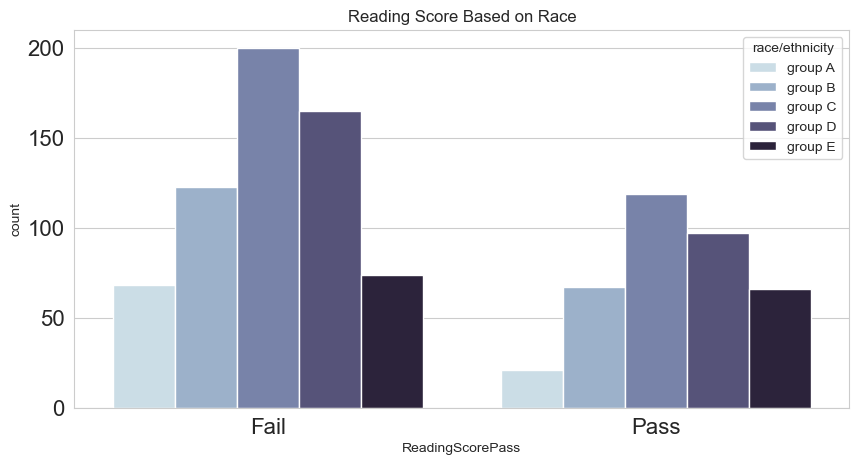

In [15]:
get_count_plot(x="ReadingScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette='ch:s=.25,rot=-.25',
              title="Reading Grade Based on Race")

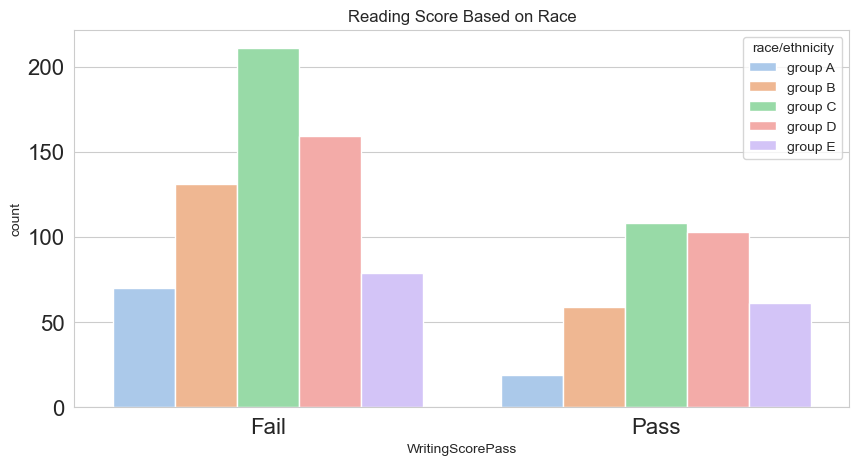

In [16]:
get_count_plot(x="WritingScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette='pastel',
              title="Writing Grade Based on Race")

## Grade Based on Parental Level of Education

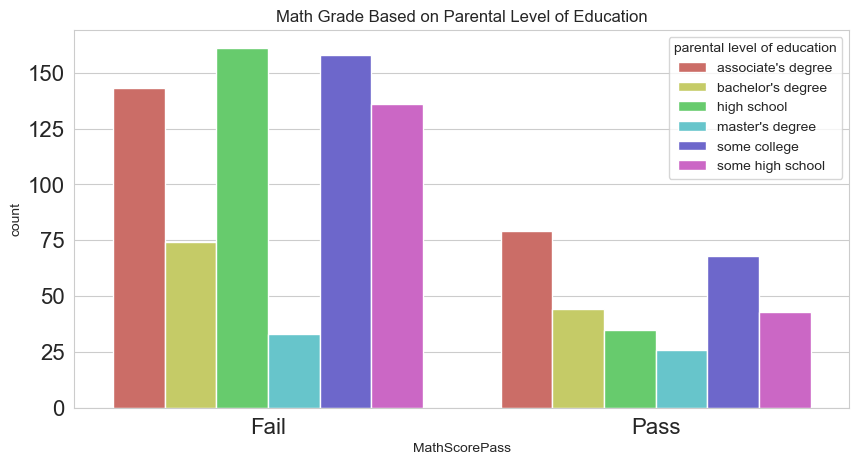

In [20]:
get_count_plot(x="MathScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette='hls',
              title="Math Grade Based on Parental Level of Education")

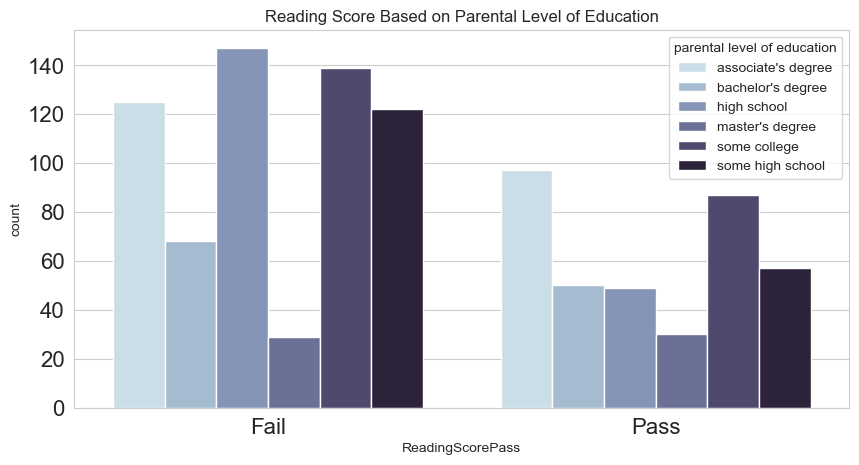

In [21]:
get_count_plot(x="ReadingScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette='ch:s=.25,rot=-.25',
              title="Reading Grade Based on Parental Level of Education")

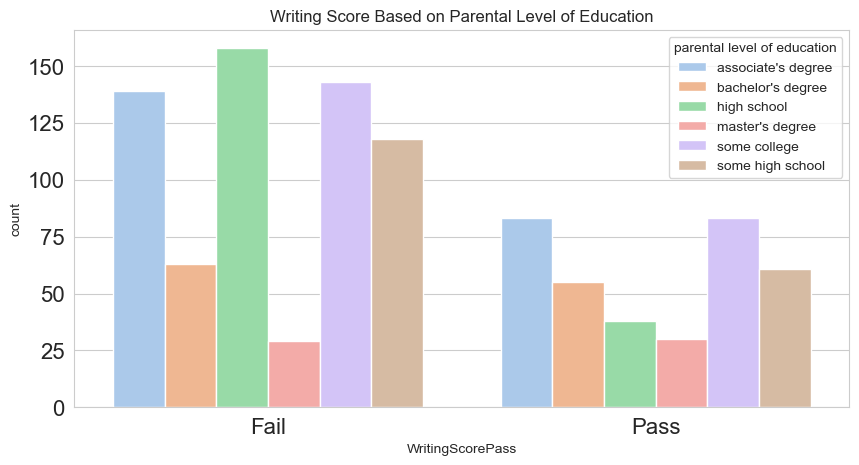

In [22]:
get_count_plot(x="WritingScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette='pastel',
              title="Writing Score Based on Parental Level of Education")

## Grade Based on Lunch 

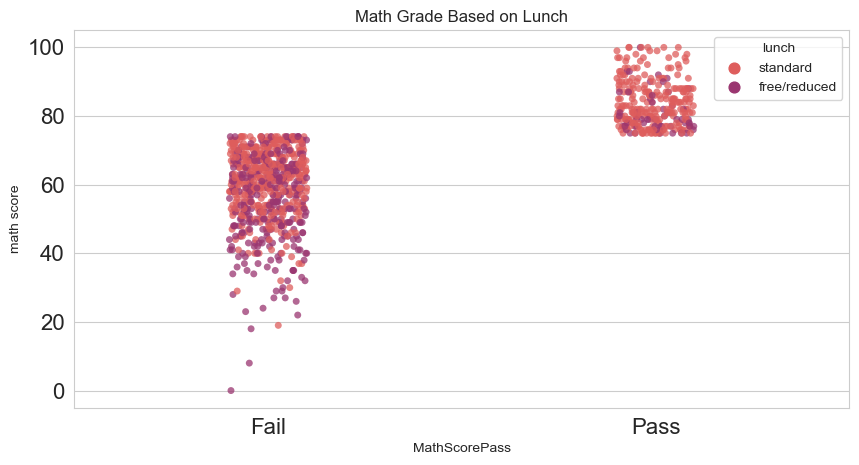

In [37]:
get_scatter_plot(x='MathScorePass', 
                 y='math score', 
                 hue='lunch',
                data=df,
                palette='flare',
                title='Math Grade Based on Lunch')

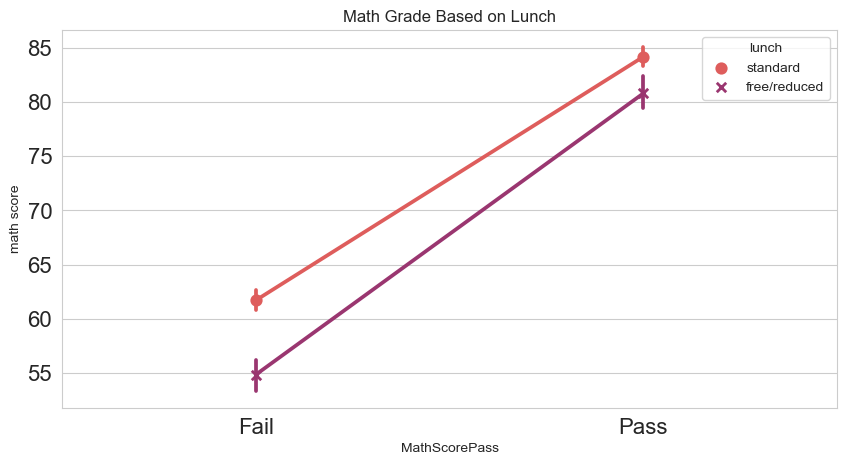

In [43]:
get_point_plot(x='MathScorePass',
              y='math score',
              hue='lunch',
              data=df,
              palette='flare',
              title='Math Grade Based on Lunch')

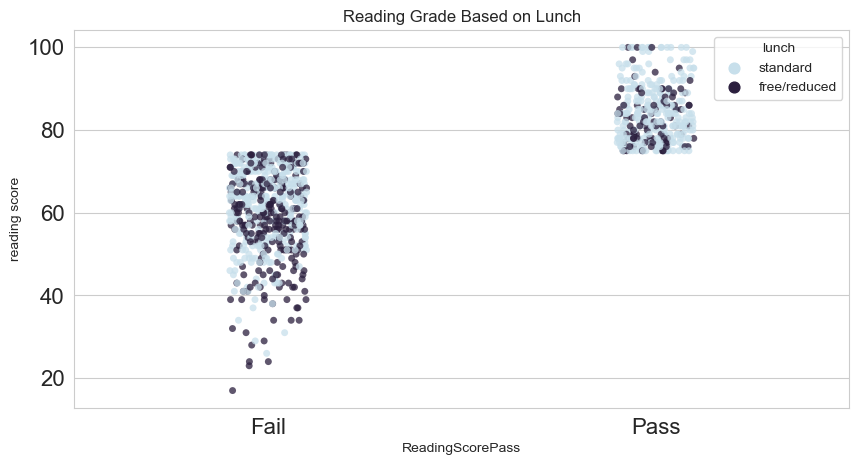

In [38]:
get_scatter_plot(x='ReadingScorePass', 
                 y='reading score', 
                 hue='lunch',
                data=df,
                palette='ch:s=.25,rot=-.25',
                title='Reading Grade Based on Lunch')

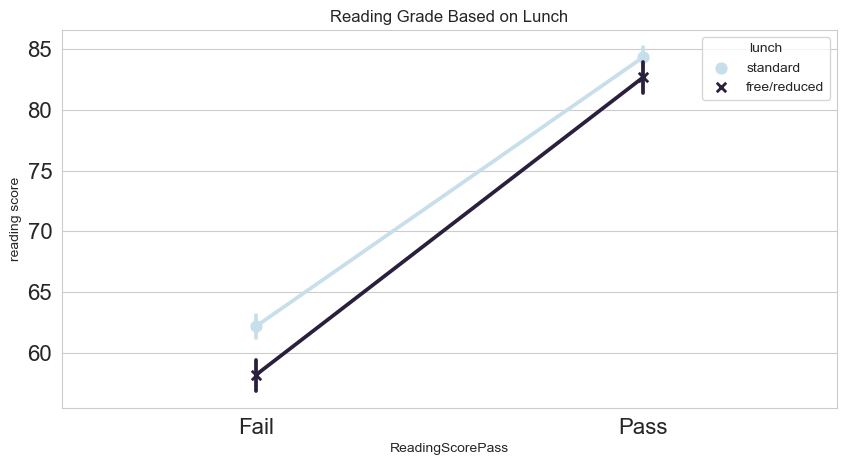

In [45]:
get_point_plot(x='ReadingScorePass',
              y='reading score',
              hue='lunch',
              data=df,
              palette='ch:s=.25,rot=-.25',
              title='Reading Grade Based on Lunch')

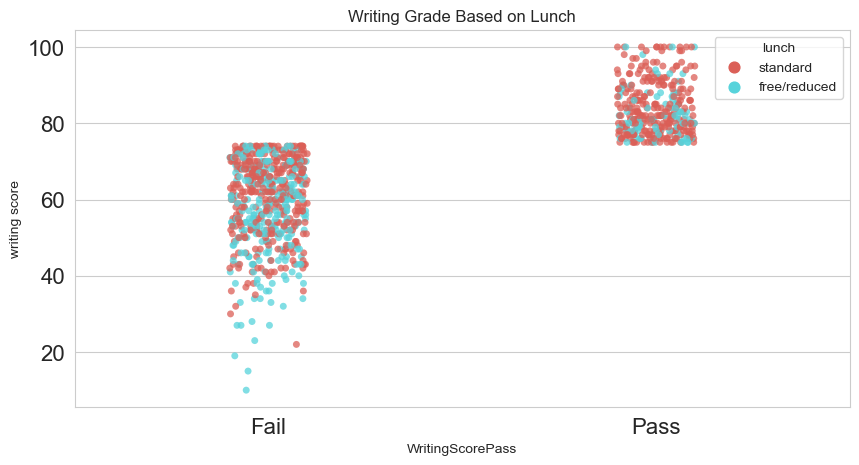

In [39]:
get_scatter_plot(x='WritingScorePass', 
                 y='writing score', 
                 hue='lunch',
                data=df,
                palette='hls',
                title='Writing Grade Based on Lunch')

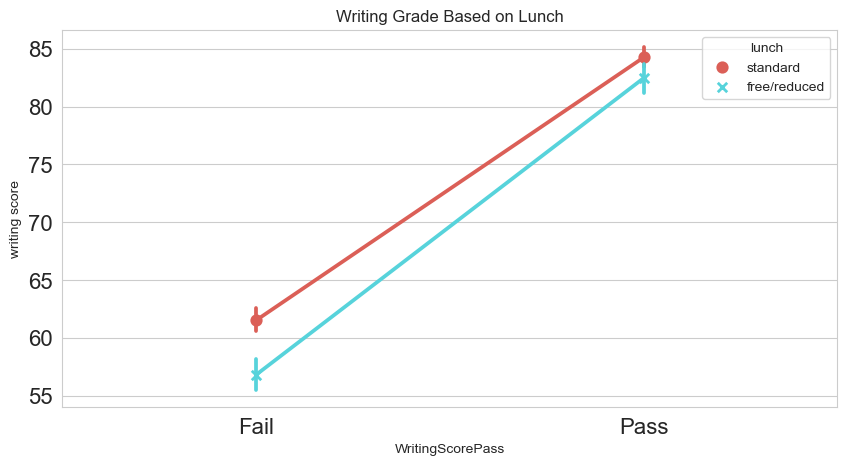

In [46]:
get_point_plot(x='WritingScorePass',
              y='writing score',
              hue='lunch',
              data=df,
              palette='hls',
              title='Writing Grade Based on Lunch')

## Grade Based on Test Preparation

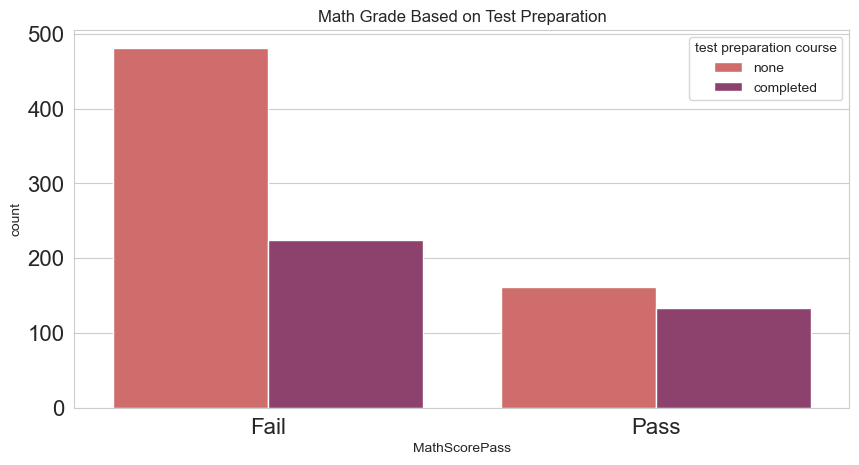

In [48]:
get_count_plot(x='MathScorePass', 
               hue='test preparation course',
               data=df,
               palette='flare',
               title='Math Grade Based on Test Preparation')

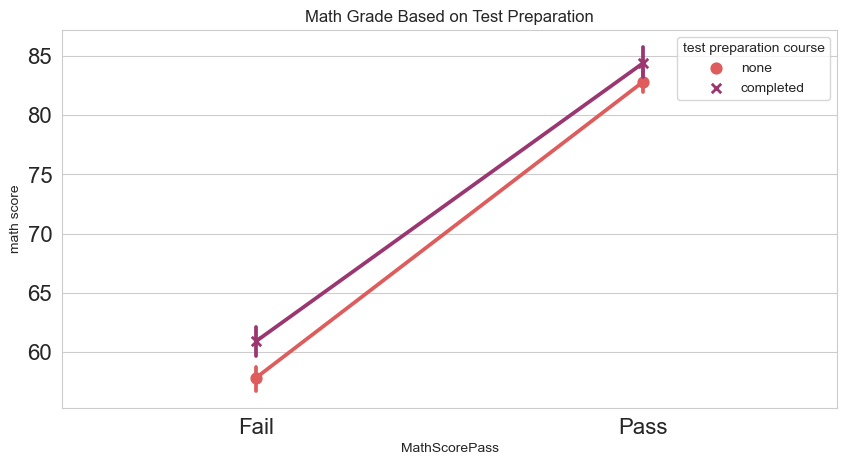

In [49]:
get_point_plot(x='MathScorePass',
              y='math score',
              hue='test preparation course',
              data=df,
              palette='flare',
              title='Math Grade Based on Test Preparation')

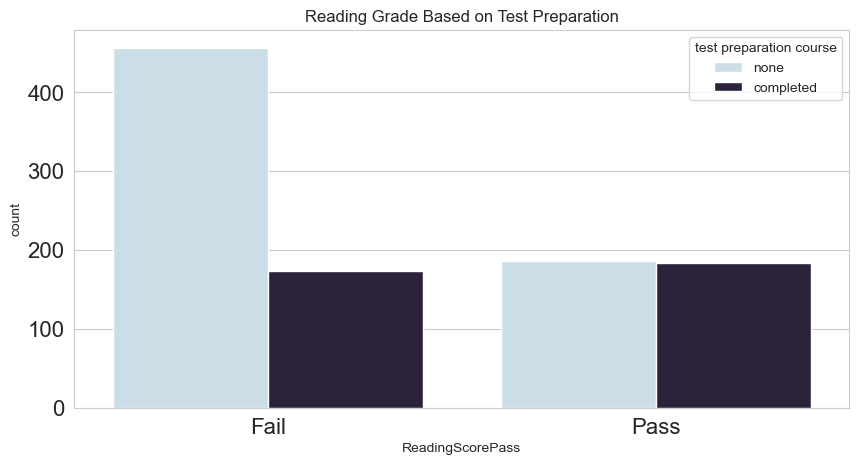

In [50]:
get_count_plot(x='ReadingScorePass', 
               hue='test preparation course',
               data=df,
               palette='ch:s=.25,rot=-.25',
               title='Reading Grade Based on Test Preparation')

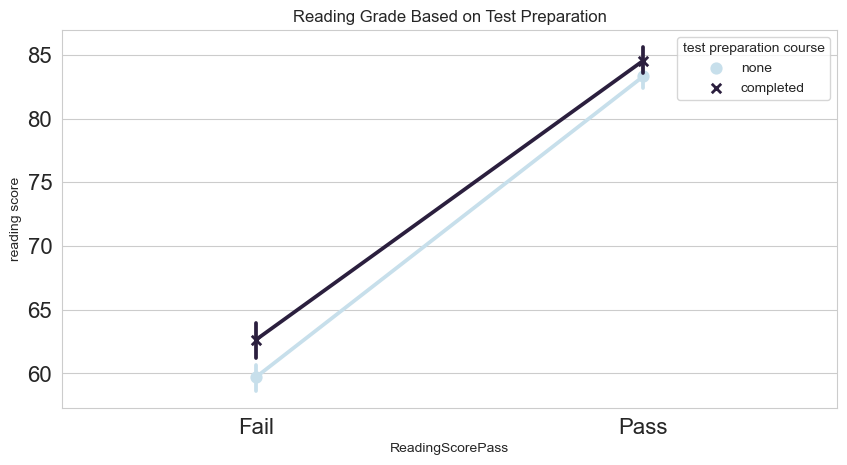

In [52]:
get_point_plot(x='ReadingScorePass',
              y='reading score',
              hue='test preparation course',
              data=df,
              palette='ch:s=.25,rot=-.25',
              title='Reading Grade Based on Test Preparation')

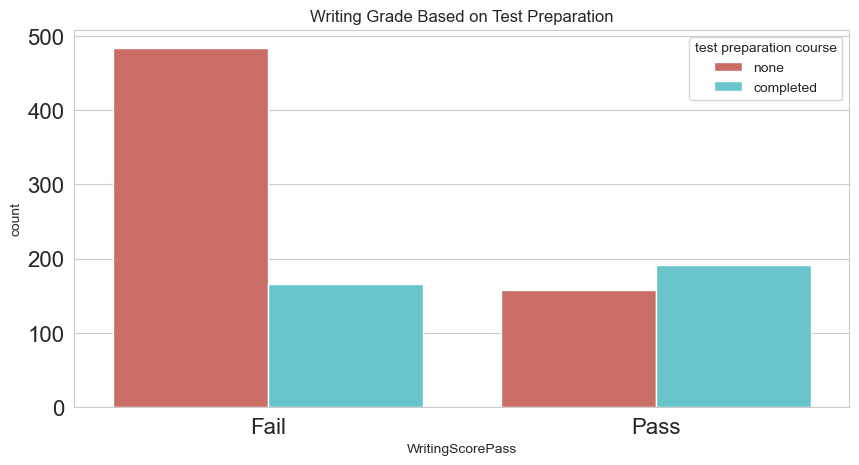

In [53]:
get_count_plot(x='WritingScorePass', 
               hue='test preparation course',
               data=df,
               palette='hls',
               title='Writing Grade Based on Test Preparation')

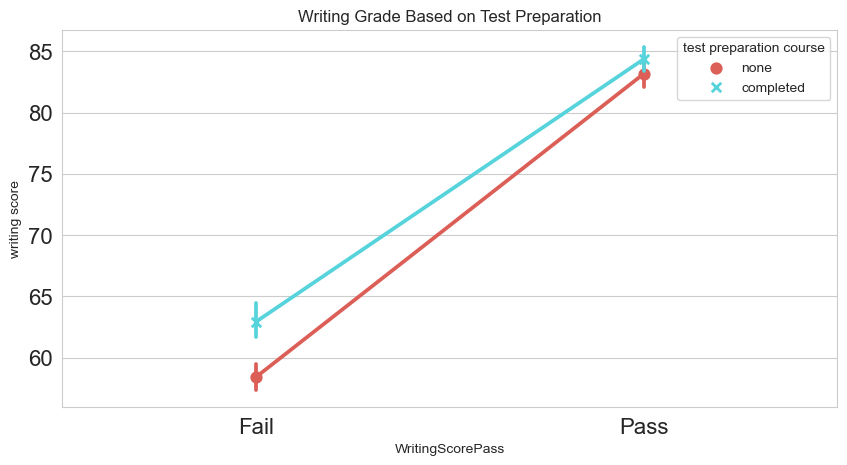

In [54]:
get_point_plot(x='WritingScorePass',
              y='writing score',
              hue='test preparation course',
              data=df,
              palette='hls',
              title='Writing Grade Based on Test Preparation')

# Summary of Analysis